## Wisconsin Diagnostic Breast Cancer Dataset

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Features are computed from a digitized image of a fine needleaspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
- Number of instances: 569
- Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)
- Missing attribute values: none
- Class distribution: 357 benign, 212 malignant

### Attribute information:
#### 1) ID number
#### 2) Diagnosis (M = malignant, B = benign)
#### 3 - 32) Ten real-valued features are computed for each cell nucleus:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry 
- fractal dimension ("coastline approximation" - 1)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

## Utilities

In [2]:
# Describe data
def describe_dataframe(df=pd.DataFrame()):
    """
    This function generates descriptive stats of a dataframe
    Args:
        df (dataframe): the dataframe to be analyzed
    Return:
        None
    """
    
    print("\n\n")
    print("*" * 30)
    print("About the Data")
    print("*" * 30)
    
    print("Number of rows:", df.shape[0])
    print("Number of columns:", df.shape[1])
    print("\n")
    
    print("Column Names:", df.columns.values)
    print("\n")
    
    print("Column Data Types:\n", df.dtypes)
    print("\n")
    
    print("Columns with Missing Values:", 
          df.columns[df.isnull().any()].tolist())
    print("\n")
    
    print("Number of rows with Missing Values:", np.count_nonzero(df.isnull()))
    print("\n")
          
    print("General Stats:")
    print(df.info())
    print("\n")
    
    print("Summary Stats:")
    print(df.describe())
    print("\n")
    
    print("Sample Rows:")
    print(df.head())

## Data preprocessing

In [3]:
# Importing the dataset
dataset = pd.read_csv('data.csv')
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
# Describe data
describe_dataframe(dataset)




******************************
About the Data
******************************
Number of rows: 569
Number of columns: 32


Column Names: ['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave_points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave_points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave_points_worst' 'symmetry_worst' 'fractal_dimension_worst']


Column Data Types:
 id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean     

## Data Visualizing

In [5]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'small',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}

plt.rcParams.update(params)

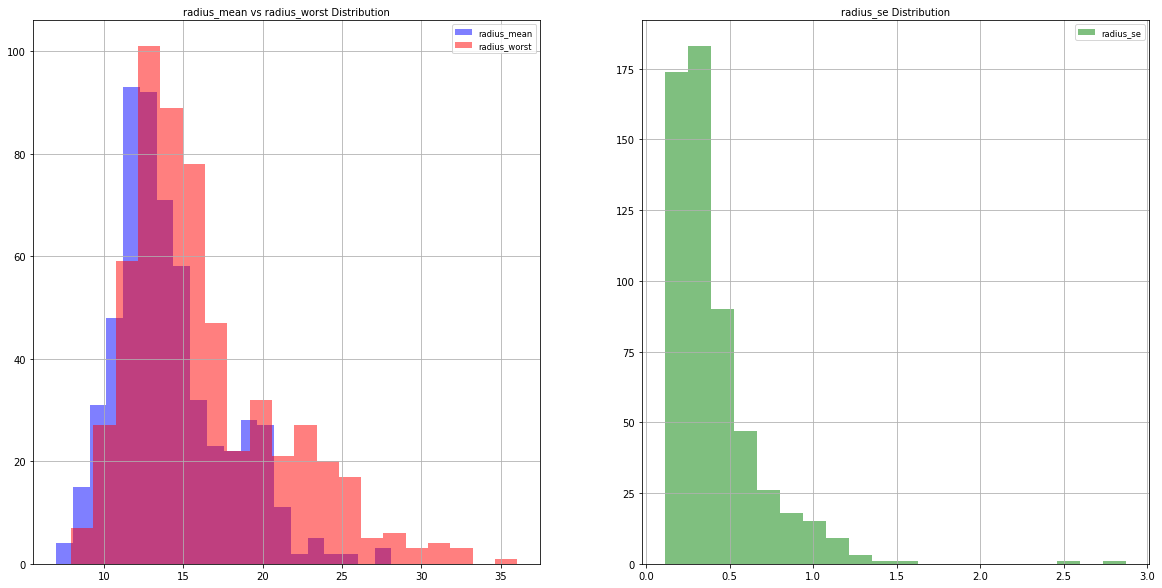

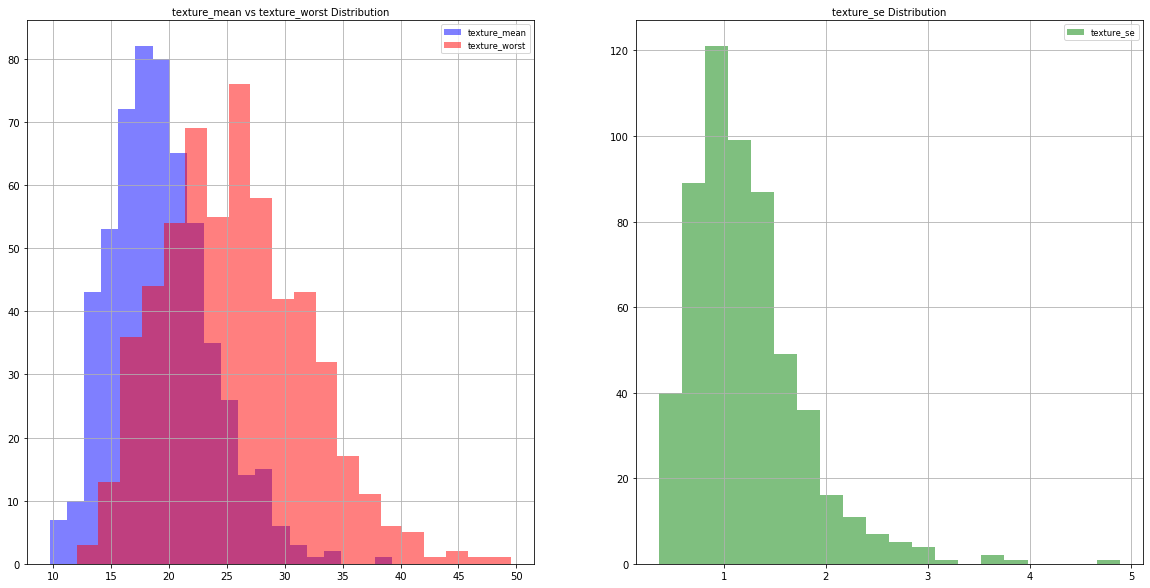

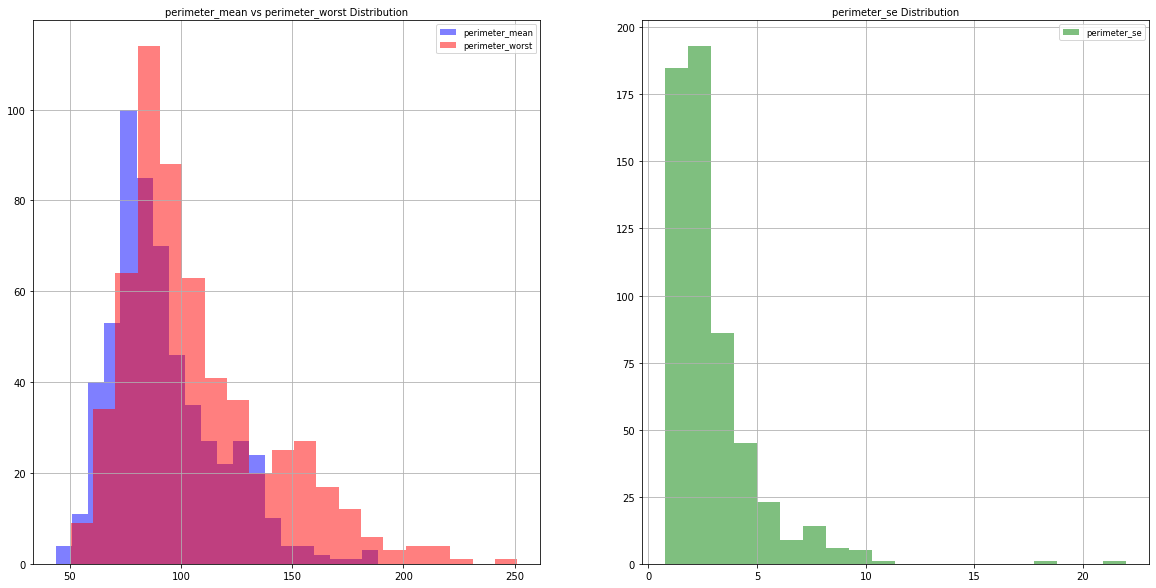

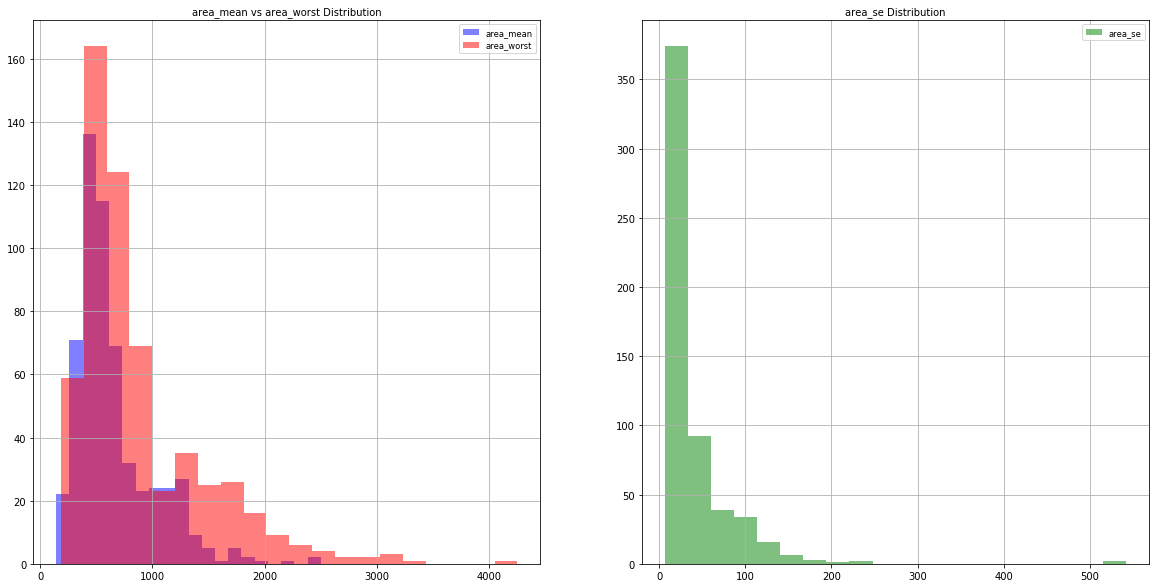

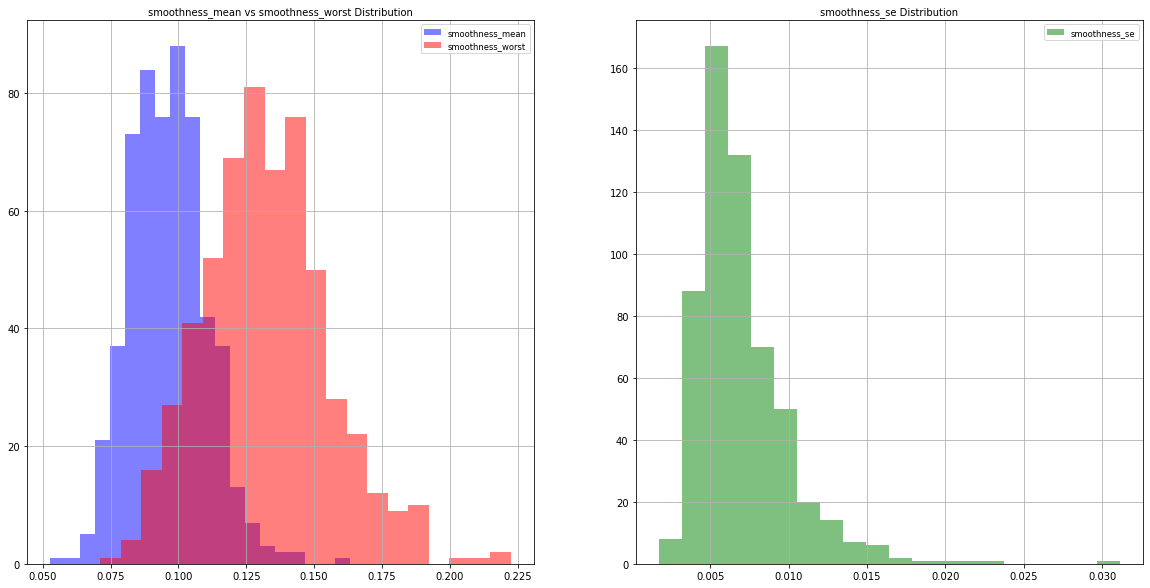

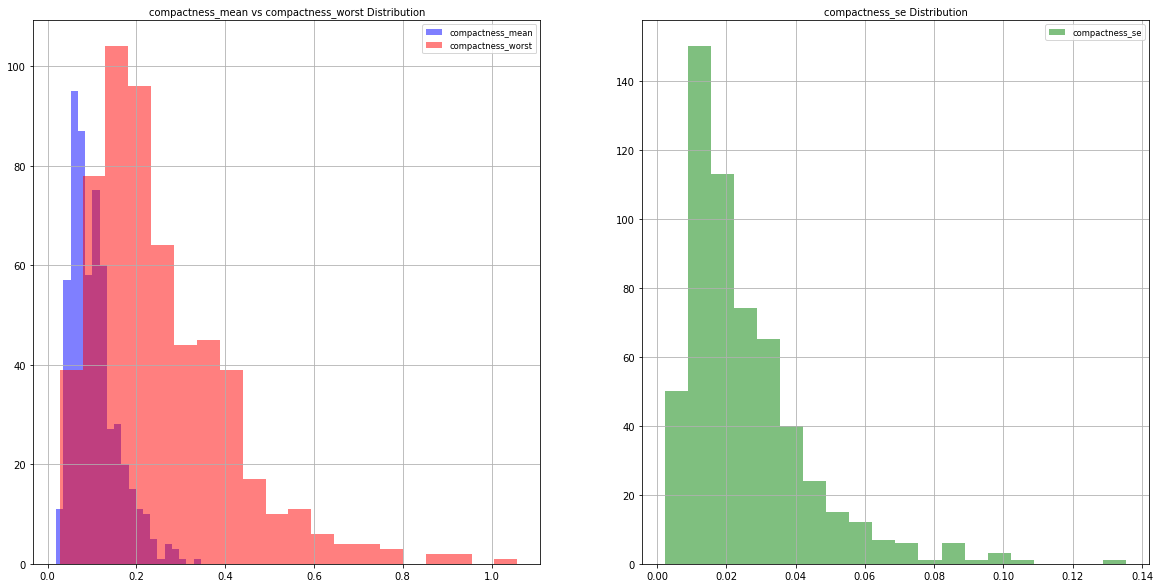

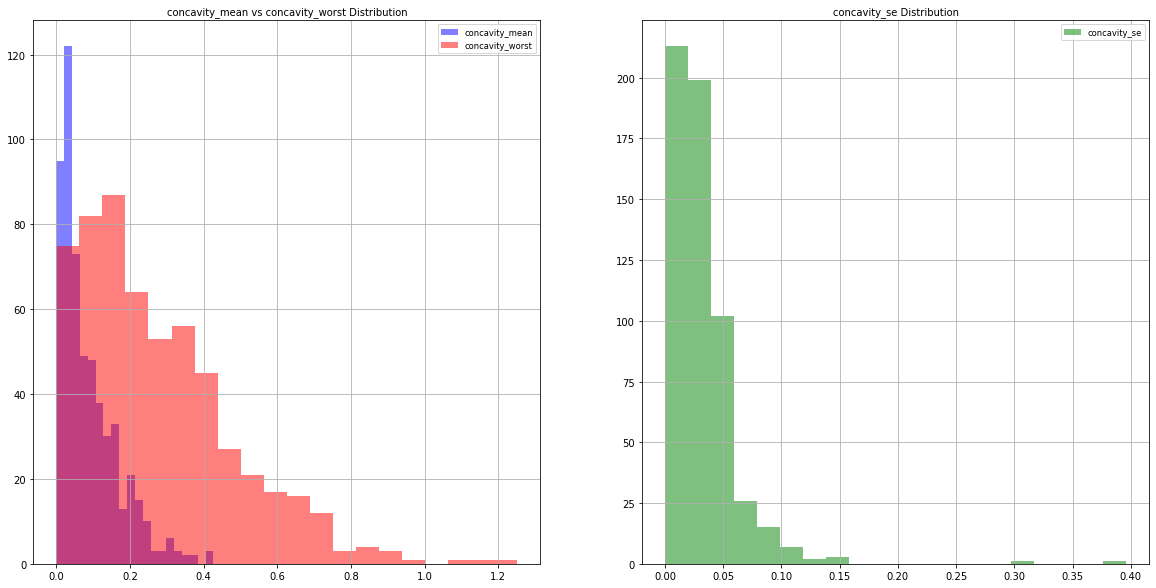

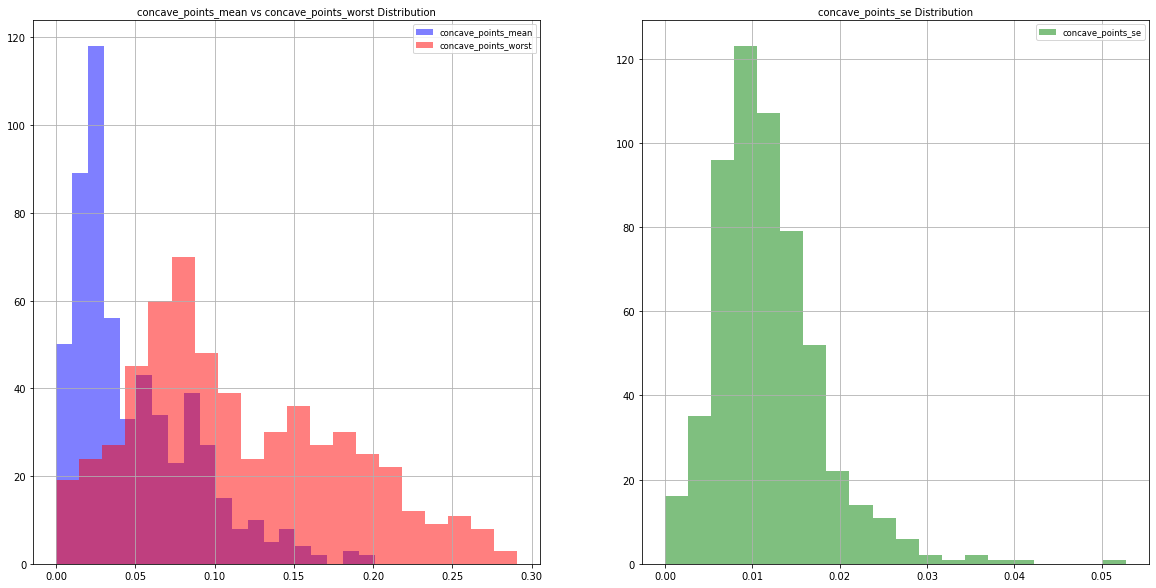

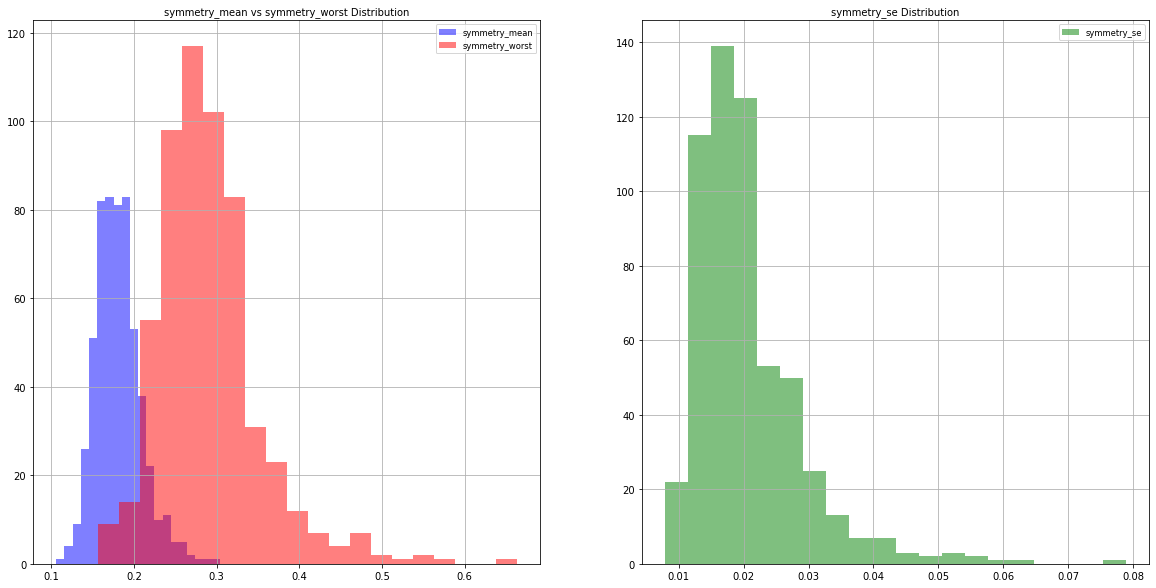

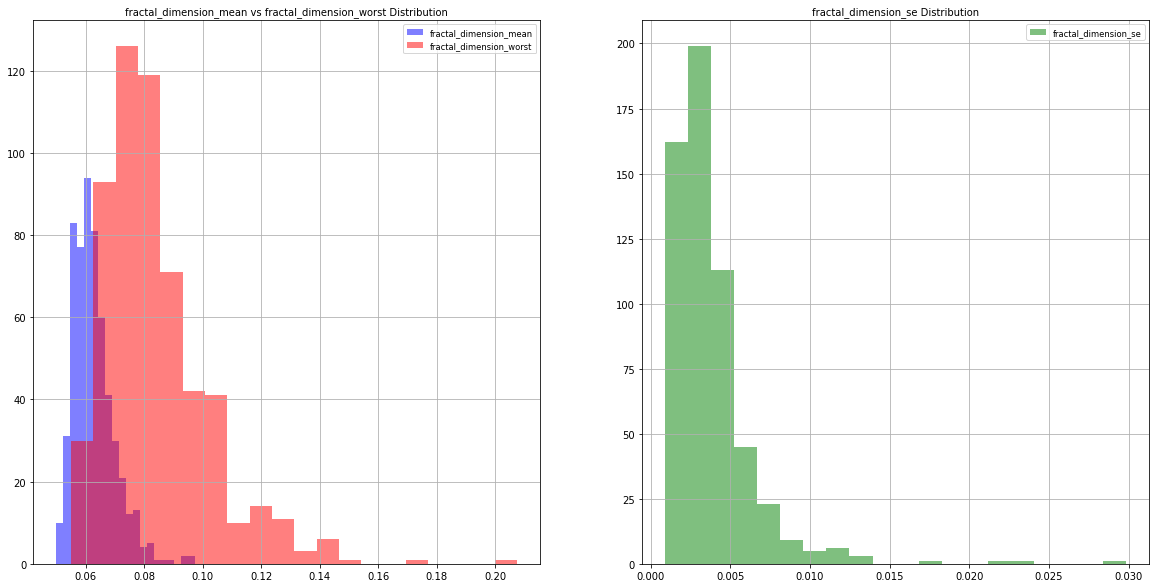

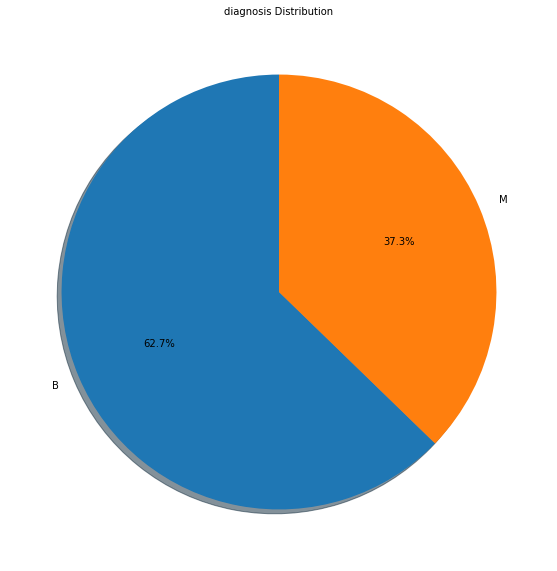

In [6]:
num_bins = 20

# radius
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(dataset['radius_mean'], num_bins, facecolor='blue', alpha=0.5, label='radius_mean')
ax[0].hist(dataset['radius_worst'], num_bins, facecolor='red', alpha=0.5, label='radius_worst')
ax[0].set_title('radius_mean vs radius_worst Distribution')
ax[0].legend()
ax[0].grid()

ax[1].hist(dataset['radius_se'], num_bins, facecolor='green', alpha=0.5, label='radius_se')
ax[1].set_title('radius_se Distribution')
ax[1].legend()
ax[1].grid()
plt.show()

# texture
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(dataset['texture_mean'], num_bins, facecolor='blue', alpha=0.5, label='texture_mean')
ax[0].hist(dataset['texture_worst'], num_bins, facecolor='red', alpha=0.5, label='texture_worst')
ax[0].set_title('texture_mean vs texture_worst Distribution')
ax[0].legend()
ax[0].grid()

ax[1].hist(dataset['texture_se'], num_bins, facecolor='green', alpha=0.5, label='texture_se')
ax[1].set_title('texture_se Distribution')
ax[1].legend()
ax[1].grid()
plt.show()

# perimeter
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(dataset['perimeter_mean'], num_bins, facecolor='blue', alpha=0.5, label='perimeter_mean')
ax[0].hist(dataset['perimeter_worst'], num_bins, facecolor='red', alpha=0.5, label='perimeter_worst')
ax[0].set_title('perimeter_mean vs perimeter_worst Distribution')
ax[0].legend()
ax[0].grid()

ax[1].hist(dataset['perimeter_se'], num_bins, facecolor='green', alpha=0.5, label='perimeter_se')
ax[1].set_title('perimeter_se Distribution')
ax[1].legend()
ax[1].grid()
plt.show()

# area
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(dataset['area_mean'], num_bins, facecolor='blue', alpha=0.5, label='area_mean')
ax[0].hist(dataset['area_worst'], num_bins, facecolor='red', alpha=0.5, label='area_worst')
ax[0].set_title('area_mean vs area_worst Distribution')
ax[0].legend()
ax[0].grid()

ax[1].hist(dataset['area_se'], num_bins, facecolor='green', alpha=0.5, label='area_se')
ax[1].set_title('area_se Distribution')
ax[1].legend()
ax[1].grid()
plt.show()

# smoothness
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(dataset['smoothness_mean'], num_bins, facecolor='blue', alpha=0.5, label='smoothness_mean')
ax[0].hist(dataset['smoothness_worst'], num_bins, facecolor='red', alpha=0.5, label='smoothness_worst')
ax[0].set_title('smoothness_mean vs smoothness_worst Distribution')
ax[0].legend()
ax[0].grid()

ax[1].hist(dataset['smoothness_se'], num_bins, facecolor='green', alpha=0.5, label='smoothness_se')
ax[1].set_title('smoothness_se Distribution')
ax[1].legend()
ax[1].grid()
plt.show()

# compactness
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(dataset['compactness_mean'], num_bins, facecolor='blue', alpha=0.5, label='compactness_mean')
ax[0].hist(dataset['compactness_worst'], num_bins, facecolor='red', alpha=0.5, label='compactness_worst')
ax[0].set_title('compactness_mean vs compactness_worst Distribution')
ax[0].legend()
ax[0].grid()

ax[1].hist(dataset['compactness_se'], num_bins, facecolor='green', alpha=0.5, label='compactness_se')
ax[1].set_title('compactness_se Distribution')
ax[1].legend()
ax[1].grid()
plt.show()

# concavity
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(dataset['concavity_mean'], num_bins, facecolor='blue', alpha=0.5, label='concavity_mean')
ax[0].hist(dataset['concavity_worst'], num_bins, facecolor='red', alpha=0.5, label='concavity_worst')
ax[0].set_title('concavity_mean vs concavity_worst Distribution')
ax[0].legend()
ax[0].grid()

ax[1].hist(dataset['concavity_se'], num_bins, facecolor='green', alpha=0.5, label='concavity_se')
ax[1].set_title('concavity_se Distribution')
ax[1].legend()
ax[1].grid()
plt.show()

# concave_points
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(dataset['concave_points_mean'], num_bins, facecolor='blue', alpha=0.5, label='concave_points_mean')
ax[0].hist(dataset['concave_points_worst'], num_bins, facecolor='red', alpha=0.5, label='concave_points_worst')
ax[0].set_title('concave_points_mean vs concave_points_worst Distribution')
ax[0].legend()
ax[0].grid()

ax[1].hist(dataset['concave_points_se'], num_bins, facecolor='green', alpha=0.5, label='concave_points_se')
ax[1].set_title('concave_points_se Distribution')
ax[1].legend()
ax[1].grid()
plt.show()

# symmetry
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(dataset['symmetry_mean'], num_bins, facecolor='blue', alpha=0.5, label='symmetry_mean')
ax[0].hist(dataset['symmetry_worst'], num_bins, facecolor='red', alpha=0.5, label='symmetry_worst')
ax[0].set_title('symmetry_mean vs symmetry_worst Distribution')
ax[0].legend()
ax[0].grid()

ax[1].hist(dataset['symmetry_se'], num_bins, facecolor='green', alpha=0.5, label='symmetry_se')
ax[1].set_title('symmetry_se Distribution')
ax[1].legend()
ax[1].grid()
plt.show()

# fractal_dimension
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(dataset['fractal_dimension_mean'], num_bins, facecolor='blue', alpha=0.5, 
           label='fractal_dimension_mean')
ax[0].hist(dataset['fractal_dimension_worst'], num_bins, facecolor='red', alpha=0.5, 
           label='fractal_dimension_worst')
ax[0].set_title('fractal_dimension_mean vs fractal_dimension_worst Distribution')
ax[0].legend()
ax[0].grid()

ax[1].hist(dataset['fractal_dimension_se'], num_bins, facecolor='green', alpha=0.5, label='fractal_dimension_se')
ax[1].set_title('fractal_dimension_se Distribution')
ax[1].legend()
ax[1].grid()
plt.show()

# diagnosis
labels = dataset['diagnosis'].value_counts().index
sizes = []
for i in dataset['diagnosis'].value_counts().values:
    sizes.append(i * 100 / sum(dataset['diagnosis'].value_counts().values))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("diagnosis Distribution")
plt.show()

## Feature Engineering

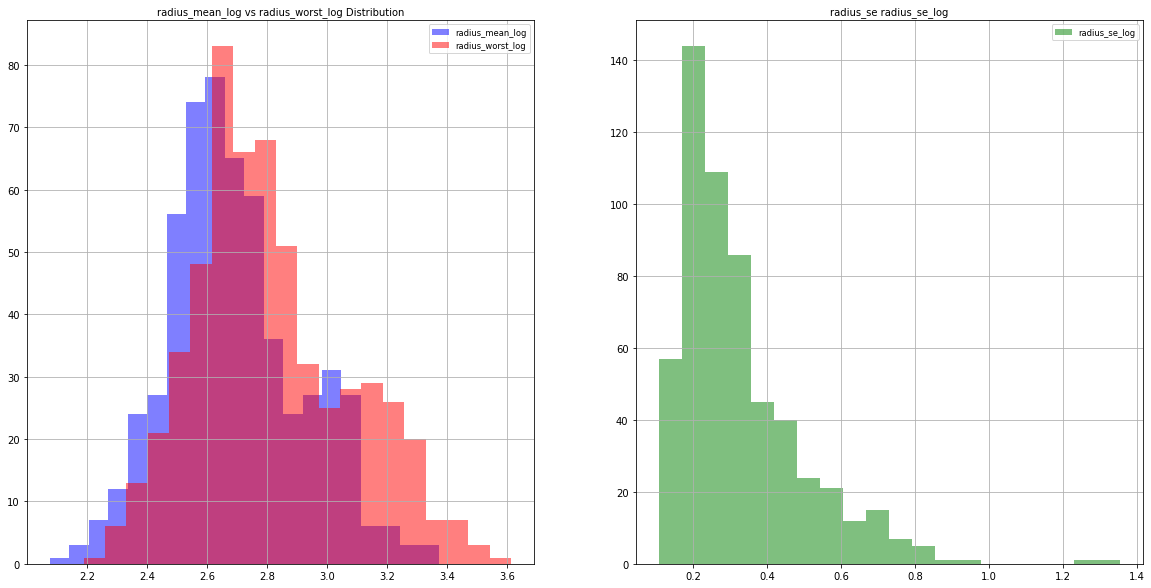

In [7]:
# radius
dataset['radius_mean_log'] = np.log((1 + dataset['radius_mean']))
dataset['radius_worst_log'] = np.log((1 + dataset['radius_worst']))
dataset['radius_se_log'] = np.log((1 + dataset['radius_se']))

# radius log visualizing
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(dataset['radius_mean_log'], num_bins, facecolor='blue', alpha=0.5, label='radius_mean_log')
ax[0].hist(dataset['radius_worst_log'], num_bins, facecolor='red', alpha=0.5, label='radius_worst_log')
ax[0].set_title('radius_mean_log vs radius_worst_log Distribution')
ax[0].legend()
ax[0].grid()

ax[1].hist(dataset['radius_se_log'], num_bins, facecolor='green', alpha=0.5, label='radius_se_log')
ax[1].set_title('radius_se radius_se_log')
ax[1].legend()
ax[1].grid()
plt.show()

# texture
dataset['texture_mean_log'] = np.log((1 + dataset['texture_mean']))
dataset['texture_worst_log'] = np.log((1 + dataset['texture_worst']))
dataset['texture_se_log'] = np.log((1 + dataset['texture_se']))

# perimeter
dataset['perimeter_mean_log'] = np.log((1 + dataset['perimeter_mean']))
dataset['perimeter_worst_log'] = np.log((1 + dataset['perimeter_worst']))
dataset['perimeter_se_log'] = np.log((1 + dataset['perimeter_se']))

# area
dataset['area_mean_log'] = np.log((1 + dataset['area_mean']))
dataset['area_worst_log'] = np.log((1 + dataset['area_worst']))
dataset['area_se_log'] = np.log((1 + dataset['area_se']))

# smoothness
dataset['smoothness_mean_log'] = np.log((1 + dataset['smoothness_mean']))
dataset['smoothness_worst_log'] = np.log((1 + dataset['smoothness_worst']))
dataset['smoothness_se_log'] = np.log((1 + dataset['smoothness_se']))

# compactness
dataset['compactness_mean_log'] = np.log((1 + dataset['compactness_mean']))
dataset['compactness_worst_log'] = np.log((1 + dataset['compactness_worst']))
dataset['compactness_se_log'] = np.log((1 + dataset['compactness_se']))

# concavity
dataset['concavity_mean_log'] = np.log((1 + dataset['concavity_mean']))
dataset['concavity_worst_log'] = np.log((1 + dataset['concavity_worst']))
dataset['concavity_se_log'] = np.log((1 + dataset['concavity_se']))

# concave_points
dataset['concave_points_mean_log'] = np.log((1 + dataset['concave_points_mean']))
dataset['concave_points_worst_log'] = np.log((1 + dataset['concave_points_worst']))
dataset['concave_points_se_log'] = np.log((1 + dataset['concave_points_se']))

# symmetry
dataset['symmetry_mean_log'] = np.log((1 + dataset['symmetry_mean']))
dataset['symmetry_worst_log'] = np.log((1 + dataset['symmetry_worst']))
dataset['symmetry_se_log'] = np.log((1 + dataset['symmetry_se']))

# fractal_dimension
dataset['fractal_dimension_mean_log'] = np.log((1 + dataset['fractal_dimension_mean']))
dataset['fractal_dimension_worst_log'] = np.log((1 + dataset['fractal_dimension_worst']))
dataset['fractal_dimension_se_log'] = np.log((1 + dataset['fractal_dimension_se']))

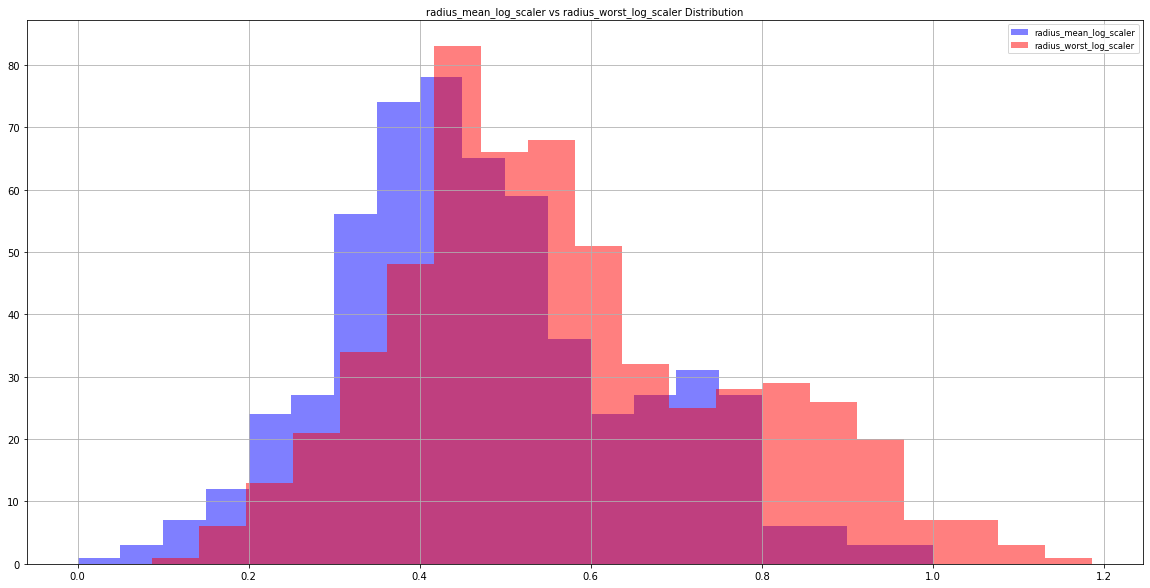

In [8]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler

# radius
radius = MinMaxScaler()
dataset['radius_mean_log_scaler'] = radius.fit_transform(dataset[['radius_mean_log']])
dataset['radius_worst_log_scaler'] = radius.transform(dataset[['radius_worst_log']])

# radius log scaler visualizing
plt.hist(dataset['radius_mean_log_scaler'], num_bins, facecolor='blue', alpha=0.5, label='radius_mean_log_scaler')
plt.hist(dataset['radius_worst_log_scaler'], num_bins, facecolor='red', alpha=0.5, label='radius_worst_log_scaler')
plt.title('radius_mean_log_scaler vs radius_worst_log_scaler Distribution')
plt.legend()
plt.grid()
plt.show()

# texture
texture = MinMaxScaler()
dataset['texture_mean_log_scaler'] = texture.fit_transform(dataset[['texture_mean_log']])
dataset['texture_worst_log_scaler'] = texture.transform(dataset[['texture_worst_log']])

# perimeter
perimeter = MinMaxScaler()
dataset['perimeter_mean_log_scaler'] = perimeter.fit_transform(dataset[['perimeter_mean_log']])
dataset['perimeter_worst_log_scaler'] = perimeter.transform(dataset[['perimeter_worst_log']])

# area
area = MinMaxScaler()
dataset['area_mean_log_scaler'] = area.fit_transform(dataset[['area_mean_log']])
dataset['area_worst_log_scaler'] = area.transform(dataset[['area_worst_log']])

# smoothness
smoothness = MinMaxScaler()
dataset['smoothness_mean_log_scaler'] = smoothness.fit_transform(dataset[['smoothness_mean_log']])
dataset['smoothness_worst_log_scaler'] = smoothness.transform(dataset[['smoothness_worst_log']])

# compactness
compactness = MinMaxScaler()
dataset['compactness_mean_log_scaler'] = compactness.fit_transform(dataset[['compactness_mean_log']])
dataset['compactness_worst_log_scaler'] = compactness.transform(dataset[['compactness_worst_log']])

# concavity
concavity = MinMaxScaler()
dataset['concavity_mean_log_scaler'] = concavity.fit_transform(dataset[['concavity_mean_log']])
dataset['concavity_worst_log_scaler'] = concavity.transform(dataset[['concavity_worst_log']])

# concave_points
concave_points = MinMaxScaler()
dataset['concave_points_mean_log_scaler'] = concave_points.fit_transform(dataset[['concave_points_mean_log']])
dataset['concave_points_worst_log_scaler'] = concave_points.transform(dataset[['concave_points_worst_log']])

# symmetry
symmetry = MinMaxScaler()
dataset['symmetry_mean_log_scaler'] = symmetry.fit_transform(dataset[['symmetry_mean_log']])
dataset['symmetry_worst_log_scaler'] = symmetry.transform(dataset[['symmetry_worst_log']])

# fractal_dimension
fractal_dimension = MinMaxScaler()
dataset['fractal_dimension_mean_log_scaler'] = fractal_dimension.fit_transform(
    dataset[['fractal_dimension_mean_log']])
dataset['fractal_dimension_worst_log_scaler'] = fractal_dimension.transform(
    dataset[['fractal_dimension_worst_log']])

In [9]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,compactness_mean_log_scaler,compactness_worst_log_scaler,concavity_mean_log_scaler,concavity_worst_log_scaler,concave_points_mean_log_scaler,concave_points_worst_log_scaler,symmetry_mean_log_scaler,symmetry_worst_log_scaler,fractal_dimension_mean_log_scaler,fractal_dimension_worst_log_scaler
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,0.813663,1.769357,0.738368,1.512527,0.748616,1.284022,0.703716,1.686568,0.610784,1.437863
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,0.203629,0.547385,0.234445,0.608835,0.369938,0.930533,0.399431,0.863436,0.144035,0.825858
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,0.465372,1.205875,0.506852,1.046155,0.656539,1.186595,0.530129,1.261124,0.214963,0.795941
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,0.831389,2.179352,0.608382,1.471137,0.545635,1.249860,0.790129,2.479584,1.000000,2.505476
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,0.380177,0.602836,0.508261,0.946651,0.541191,0.821362,0.397889,0.676765,0.190206,0.570294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,0.326010,0.621627,0.614042,0.968072,0.709481,1.091863,0.355060,0.525600,0.134618,0.451766
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,0.285415,0.564352,0.378497,0.784301,0.509534,0.822769,0.368509,0.778067,0.115344,0.350643
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,0.281821,0.902261,0.248929,0.824044,0.281813,0.723354,0.284223,0.604635,0.139969,0.600091
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,0.811970,2.182826,0.847249,1.862560,0.771867,1.282297,0.692950,1.468956,0.430859,1.540687


In [10]:
# Remove Duplicate features
dataset = dataset.drop(['radius_mean', 'radius_mean_log', 'radius_worst', 'radius_worst_log', 'radius_se',
                        
                        'texture_mean', 'texture_mean_log', 'texture_worst', 'texture_worst_log', 'texture_se',
                        
                        'perimeter_mean', 'perimeter_mean_log', 'perimeter_worst', 'perimeter_worst_log', 
                        'perimeter_se',
                        
                        'area_mean', 'area_mean_log', 'area_worst', 'area_worst_log', 'area_se',
                        
                        'smoothness_mean', 'smoothness_mean_log', 'smoothness_worst', 'smoothness_worst_log',
                        'smoothness_se',
                        
                        'compactness_mean', 'compactness_mean_log', 'compactness_worst', 'compactness_worst_log',
                        'compactness_se',
                        
                        'concavity_mean', 'concavity_mean_log', 'concavity_worst', 'concavity_worst_log', 
                        'concavity_se',
                        
                        'concave_points_mean', 'concave_points_mean_log', 'concave_points_worst', 
                        'concave_points_worst_log', 'concave_points_se',
                        
                        'symmetry_mean', 'symmetry_mean_log', 'symmetry_worst', 'symmetry_worst_log', 
                        'symmetry_se',
                        
                        'fractal_dimension_mean', 'fractal_dimension_mean_log', 'fractal_dimension_worst', 
                        'fractal_dimension_worst_log', 'fractal_dimension_se',
                       ], axis=1)
dataset

,id,diagnosis,radius_se_log,texture_se_log,perimeter_se_log,area_se_log,smoothness_se_log,compactness_se_log,concavity_se_log,concave_points_se_log,...,compactness_mean_log_scaler,compactness_worst_log_scaler,concavity_mean_log_scaler,concavity_worst_log_scaler,concave_points_mean_log_scaler,concave_points_worst_log_scaler,symmetry_mean_log_scaler,symmetry_worst_log_scaler,fractal_dimension_mean_log_scaler,fractal_dimension_worst_log_scaler
0,842302,M,0.739554,0.644639,2.260617,5.039547,0.006379,0.047875,0.052336,0.015745,...,0.813663,1.769357,0.738368,1.512527,0.748616,1.284022,0.703716,1.686568,0.610784,1.437863
1,842517,M,0.434053,0.550373,1.481150,4.318554,0.005211,0.012995,0.018429,0.013311,...,0.203629,0.547385,0.234445,0.608835,0.369938,0.930533,0.399431,0.863436,0.144035,0.825858
2,84300903,M,0.557098,0.580482,1.720084,4.554193,0.006131,0.039278,0.037604,0.020371,...,0.465372,1.205875,0.506852,1.046155,0.656539,1.186595,0.530129,1.261124,0.214963,0.795941
3,84348301,M,0.402527,0.768255,1.491780,3.340385,0.009069,0.071930,0.055066,0.018498,...,0.831389,2.179352,0.608382,1.471137,0.545635,1.249860,0.790129,2.479584,1.000000,2.505476
4,84358402,M,0.563722,0.577343,1.862218,4.558498,0.011424,0.024312,0.055321,0.018675,...,0.380177,0.602836,0.508261,0.946651,0.541191,0.821362,0.397889,0.676765,0.190206,0.570294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,0.777488,0.813593,2.160215,5.073297,0.010247,0.028500,0.050674,0.024244,...,0.326010,0.621627,0.614042,0.968072,0.709481,1.091863,0.355060,0.525600,0.134618,0.451766
565,926682,M,0.568434,1.242135,1.825033,4.605570,0.005752,0.023941,0.038740,0.016641,...,0.285415,0.564352,0.378497,0.784301,0.509534,0.822769,0.368509,0.778067,0.115344,0.350643
566,926954,M,0.375968,0.729961,1.487270,3.902982,0.005886,0.036631,0.046215,0.015450,...,0.281821,0.902261,0.248929,0.824044,0.281813,0.723354,0.284223,0.604635,0.139969,0.600091
567,927241,M,0.545807,0.953587,1.912796,4.468434,0.006501,0.059758,0.068752,0.016503,...,0.811970,2.182826,0.847249,1.862560,0.771867,1.282297,0.692950,1.468956,0.430859,1.540687


In [11]:
# Setting features, targets
target = dataset['diagnosis']
feature = dataset.drop(['diagnosis', 'id'], axis=1)

# Dummy Coding
target = pd.get_dummies(target)

In [12]:
target

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
564,0,1
565,0,1
566,0,1
567,0,1


In [13]:
feature

,radius_se_log,texture_se_log,perimeter_se_log,area_se_log,smoothness_se_log,compactness_se_log,concavity_se_log,concave_points_se_log,symmetry_se_log,fractal_dimension_se_log,...,compactness_mean_log_scaler,compactness_worst_log_scaler,concavity_mean_log_scaler,concavity_worst_log_scaler,concave_points_mean_log_scaler,concave_points_worst_log_scaler,symmetry_mean_log_scaler,symmetry_worst_log_scaler,fractal_dimension_mean_log_scaler,fractal_dimension_worst_log_scaler
0,0.739554,0.644639,2.260617,5.039547,0.006379,0.047875,0.052336,0.015745,0.029588,0.006174,...,0.813663,1.769357,0.738368,1.512527,0.748616,1.284022,0.703716,1.686568,0.610784,1.437863
1,0.434053,0.550373,1.481150,4.318554,0.005211,0.012995,0.018429,0.013311,0.013794,0.003526,...,0.203629,0.547385,0.234445,0.608835,0.369938,0.930533,0.399431,0.863436,0.144035,0.825858
2,0.557098,0.580482,1.720084,4.554193,0.006131,0.039278,0.037604,0.020371,0.022251,0.004561,...,0.465372,1.205875,0.506852,1.046155,0.656539,1.186595,0.530129,1.261124,0.214963,0.795941
3,0.402527,0.768255,1.491780,3.340385,0.009069,0.071930,0.055066,0.018498,0.057920,0.009166,...,0.831389,2.179352,0.608382,1.471137,0.545635,1.249860,0.790129,2.479584,1.000000,2.505476
4,0.563722,0.577343,1.862218,4.558498,0.011424,0.024312,0.055321,0.018675,0.017408,0.005102,...,0.380177,0.602836,0.508261,0.946651,0.541191,0.821362,0.397889,0.676765,0.190206,0.570294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.777488,0.813593,2.160215,5.073297,0.010247,0.028500,0.050674,0.024244,0.011078,0.004230,...,0.326010,0.621627,0.614042,0.968072,0.709481,1.091863,0.355060,0.525600,0.134618,0.451766
565,0.568434,1.242135,1.825033,4.605570,0.005752,0.023941,0.038740,0.016641,0.018802,0.002495,...,0.285415,0.564352,0.378497,0.784301,0.509534,0.822769,0.368509,0.778067,0.115344,0.350643
566,0.375968,0.729961,1.487270,3.902982,0.005886,0.036631,0.046215,0.015450,0.013094,0.003884,...,0.281821,0.902261,0.248929,0.824044,0.281813,0.723354,0.284223,0.604635,0.139969,0.600091
567,0.545807,0.953587,1.912796,4.468434,0.006501,0.059758,0.068752,0.016503,0.022974,0.006166,...,0.811970,2.182826,0.847249,1.862560,0.771867,1.282297,0.692950,1.468956,0.430859,1.540687


## Feature Selection

In [14]:
# print('Feature set data [shape: '+str(feature.shape)+']')
# print('Feature names:')
# print(np.array(feature.columns), '\n')

In [15]:
# from sklearn.feature_selection import chi2, SelectKBest

# skb = SelectKBest(score_func=chi2, k = 19)
# skb.fit(feature, target)

# feature_scores = [(item, score) for item, score in zip(
#                                 feature.columns, skb.scores_)]   
# sorted(feature_scores, key=lambda x: -x[1])[:19]

In [16]:
# select_features_kbest = skb.get_support()
# features_names_kbest = feature.columns[select_features_kbest]
# features_selection = feature[features_names_kbest]

In [17]:
# features_selection

## Setting Training set vs Test set

In [18]:
# Setting X, y
# X = features_selection.values
X = feature.values
y = target.values

# Splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0)

In [19]:
X_train.shape

(455, 30)

In [20]:
X_test.shape

(114, 30)

## Building Model

### Construction Phase

In [21]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [221]:
# Network Parameters
n_input = X_train.shape[1]
n_hidden_1 = 1000
n_hidden_2 = 1000
n_classes = 2

In [222]:
# Graph input
X = tf.placeholder(tf.float32, shape = (None, n_input), name="X")
y = tf.placeholder(tf.float32, shape = (None, n_classes), name="y")

In [223]:
# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer

In [224]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(
        tf.truncated_normal((n_input, n_hidden_1), stddev=2/np.sqrt(n_input + n_hidden_1))
    ),
    'h2': tf.Variable(
        tf.truncated_normal((n_hidden_1, n_hidden_2), stddev=2/np.sqrt(n_hidden_1 + n_hidden_2))
    ),
    'out': tf.Variable(
        tf.truncated_normal((n_hidden_2, n_classes), stddev=2/np.sqrt(n_hidden_2 + n_classes))
    )
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [225]:
# Construct model
pred = multilayer_perceptron(X, weights, biases)

In [226]:
# Define loss
xentropy = tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y)
loss = tf.reduce_mean(xentropy)

In [227]:
# Define optimizer
learning_rate = 0.00001

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

In [228]:
# Evaluate
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [229]:
# Initializing the variables
init = tf.global_variables_initializer()

### Execution Phase

In [241]:
# Parameters
training_epochs = 1500
batch_size = 130
display_step = 50

In [242]:
# Launch the graph

with tf.Session() as sess:
    sess.run(init)
    
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(len(X_train)/batch_size)
        X_batches = np.array_split(X_train, total_batch)
        Y_batches = np.array_split(y_train, total_batch)
        
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = X_batches[i], Y_batches[i]
        
            _, l = sess.run([optimizer, loss], feed_dict={X: batch_x, y: batch_y})
            
            # Compute average loss
            avg_cost += l / total_batch
            
        acc_train = accuracy.eval(feed_dict={X: batch_x, y: batch_y})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
            
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
            print("Train accuracy:", acc_train, "Test accuracy:", acc_test)
            print("\n")
            
    print("Optimization Finished!")
    
    print("Accuracy:", accuracy.eval({X: X_test, y: y_test}))
    
    result = tf.argmax(pred, 1).eval({X: X_test, y: y_test})
    print(result)

Epoch: 0001 cost= 1.561970750
Train accuracy: 0.615894 Test accuracy: 0.5877193


Epoch: 0051 cost= 0.446515054
Train accuracy: 0.8543046 Test accuracy: 0.81578946


Epoch: 0101 cost= 0.333463103
Train accuracy: 0.9139073 Test accuracy: 0.92105263


Epoch: 0151 cost= 0.259281397
Train accuracy: 0.9470199 Test accuracy: 0.9298246


Epoch: 0201 cost= 0.209334895
Train accuracy: 0.9470199 Test accuracy: 0.9298246


Epoch: 0251 cost= 0.178183044
Train accuracy: 0.9470199 Test accuracy: 0.92105263


Epoch: 0301 cost= 0.157164469
Train accuracy: 0.95364237 Test accuracy: 0.92105263


Epoch: 0351 cost= 0.141832044
Train accuracy: 0.95364237 Test accuracy: 0.92105263


Epoch: 0401 cost= 0.129859810
Train accuracy: 0.95364237 Test accuracy: 0.92105263


Epoch: 0451 cost= 0.120113134
Train accuracy: 0.9668874 Test accuracy: 0.9298246


Epoch: 0501 cost= 0.111790620
Train accuracy: 0.9668874 Test accuracy: 0.9298246


Epoch: 0551 cost= 0.104759576
Train accuracy: 0.9668874 Test accuracy: 0.929824